# Anomaly Detection Project
By Jeff Akins

### ![](https://mk0crunchmetric1ct0g.kinstacdn.com/wp-content/uploads/2019/10/Anomaly-detection-on-time-series-data-with-auto-encoders.jpg)

#### Imports:

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
import prepare as prep

#### Data is prepped in the prepare.py file and retrived in the next line:
These are the steps that I took to clean the data:
- Created a function to retrieve the data from the server and then write it to a csv file for quicker access later
- Created a function that adds the course names to the data
- Filled the start, end, created, and update null dates with the log entry date
- Combined the date and time columns, then converted to datetime, and made it the index
- Converted all dates and time columns to datetime format
- Created an hour and weekday columns
- Dropped the original date and time columns
- Filled nulls with 0 for numeric columns (made it easy to filter if needed)
- Filled nulls with 'none' for string columns (made it easy to filter if needed)
- Turn the weekday column into an ordered categorical (for order of days in plotting)

In [2]:
log = prep.prep_logs()

#### Initial Data Exploration:

In [3]:
log.head(1)

,path,user_id,cohort_id,ip,name,slack,start_date,end_date,created_at,updated_at,program_id,course_name,course_subdomain,hour,weekday
timestamp,,,,,,,,,,,,,,,
2018-01-26 09:55:03,/,1,8,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1,PHP Full Stack Web Dev,php,9,Friday


In [4]:
log.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 900223 entries, 2018-01-26 09:55:03 to 2021-04-21 16:44:39
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   path              900222 non-null  object        
 1   user_id           900223 non-null  int64         
 2   cohort_id         900223 non-null  int64         
 3   ip                900223 non-null  object        
 4   name              900223 non-null  object        
 5   slack             900223 non-null  object        
 6   start_date        900223 non-null  datetime64[ns]
 7   end_date          900223 non-null  datetime64[ns]
 8   created_at        900223 non-null  datetime64[ns]
 9   updated_at        900223 non-null  datetime64[ns]
 10  program_id        900223 non-null  int64         
 11  course_name       900223 non-null  object        
 12  course_subdomain  900223 non-null  object        
 13  hour              900223 

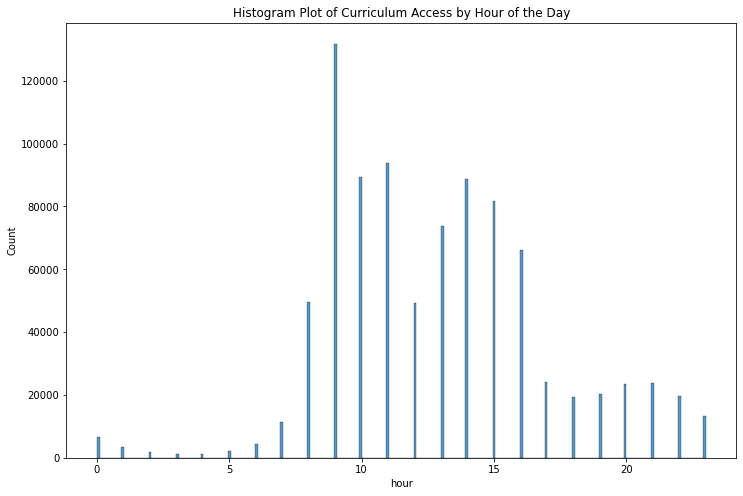

In [5]:
# Histogram Plot of Curriculum Access by Hour of the Day
plt.figure(figsize=(12, 8))
sns.histplot(data=log,
    x="hour", palette="ch:s=.25,rot=-.25",)
plt.title('Histogram Plot of Curriculum Access by Hour of the Day')
plt.show()

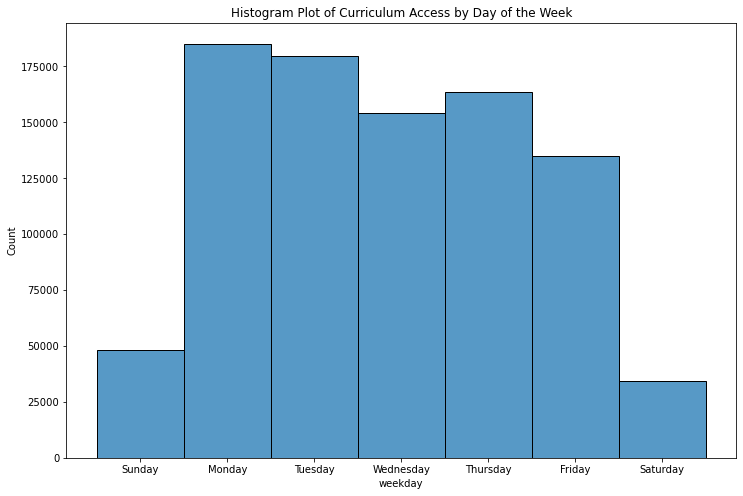

In [6]:
# Histogram Plot of Curriculum Access by Day of the Week
plt.figure(figsize=(12, 8))
sns.histplot(data=log,
    x="weekday", palette="ch:s=.25,rot=-.25",)
plt.title('Histogram Plot of Curriculum Access by Day of the Week')
plt.show()

## Questions

### 1. Which lesson appears to attract the most traffic consistently across cohorts (per program)?

In [7]:
log.head(1)

,path,user_id,cohort_id,ip,name,slack,start_date,end_date,created_at,updated_at,program_id,course_name,course_subdomain,hour,weekday
timestamp,,,,,,,,,,,,,,,
2018-01-26 09:55:03,/,1,8,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1,PHP Full Stack Web Dev,php,9,Friday


In [8]:
# Removing all paths that are not a lesson
lesson = log.copy()
lesson = lesson[lesson.path.str.endswith('jpg') == False]
lesson = lesson[lesson.path.str.endswith('jpeg') == False]
lesson = lesson[lesson.path.str.endswith('svg') == False]
lesson = lesson[(lesson.path != '/') & (lesson.path != 'search/search_index.json') 
                & (lesson.path != 'toc') & (lesson.path != 'appendix')]

In [9]:
# List of top 20 lessons across all cohorts:
top_lessons = pd.DataFrame(lesson.path.value_counts().head(20))
top_lessons

,path
javascript-i,18983
java-iii,13733
html-css,13635
java-ii,12685
spring,12524
jquery,11525
mysql,11033
java-i,10865
javascript-ii,10730
javascript-i/introduction/working-with-data-types-operators-and-variables,7642


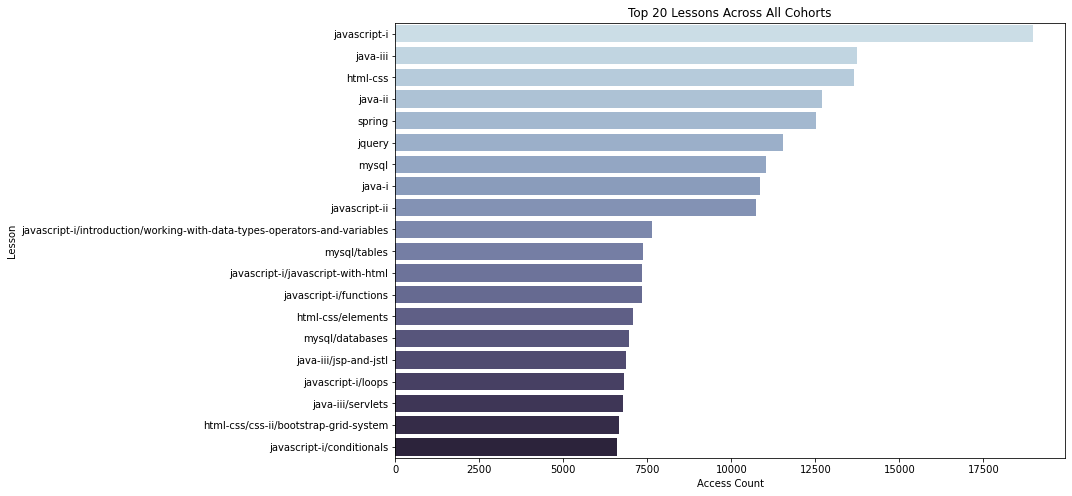

In [10]:
# Plot of top 20 lessons across all cohorts:
plt.figure(figsize=(12, 8))
sns.barplot(data=top_lessons,
    x="path", y=top_lessons.index, palette="ch:s=.25,rot=-.25", )
plt.title('Top 20 Lessons Across All Cohorts')
plt.xlabel('Access Count')
plt.ylabel('Lesson')
plt.show()

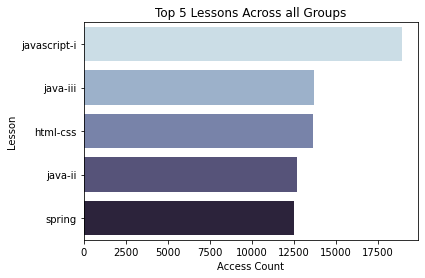

,path
javascript-i,18983
java-iii,13733
html-css,13635
java-ii,12685
spring,12524


In [11]:
# Top 5 lessons for all Groups
top_course_lessons = pd.DataFrame(lesson.path.value_counts().head(5))
plt.figure(figsize=(6, 4))
sns.barplot(data=top_course_lessons,
x="path", y=top_course_lessons.index, palette="ch:s=.25,rot=-.25", )
plt.title('Top 5 Lessons Across all Groups')
plt.xlabel('Access Count')
plt.ylabel('Lesson')
plt.show()
top_course_lessons

##### Top Five Lessons for Each Program

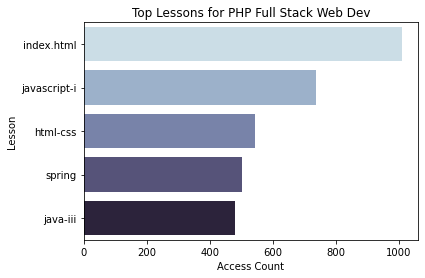

,path
index.html,1011
javascript-i,736
html-css,542
spring,501
java-iii,479


In [12]:
# Top lessons for PHP Web Dev
top_course_lessons = pd.DataFrame(lesson[lesson.course_subdomain == 'php'].path.value_counts().head(5))
plt.figure(figsize=(6, 4))
sns.barplot(data=top_course_lessons,
x="path", y=top_course_lessons.index, palette="ch:s=.25,rot=-.25", )
plt.title('Top Lessons for PHP Full Stack Web Dev')
plt.xlabel('Access Count')
plt.ylabel('Lesson')
plt.show()
top_course_lessons

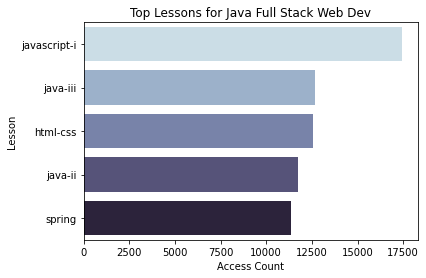

,path
javascript-i,17457
java-iii,12683
html-css,12569
java-ii,11719
spring,11376


In [13]:
# Top lessons for Java Full Stack Web Dev
top_course_lessons = pd.DataFrame(lesson[lesson.course_subdomain == 'java'].path.value_counts().head(5))
plt.figure(figsize=(6, 4))
sns.barplot(data=top_course_lessons,
x="path", y=top_course_lessons.index, palette="ch:s=.25,rot=-.25", )
plt.title('Top Lessons for Java Full Stack Web Dev')
plt.xlabel('Access Count')
plt.ylabel('Lesson')
plt.show()
top_course_lessons

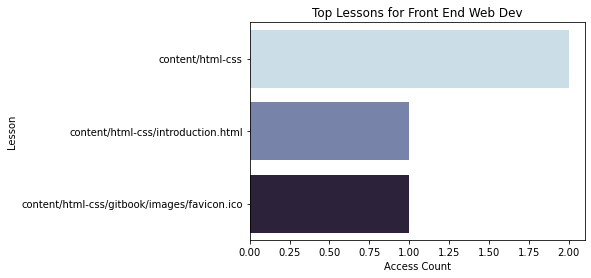

,path
content/html-css,2
content/html-css/introduction.html,1
content/html-css/gitbook/images/favicon.ico,1


In [14]:
# Top lessons for Front End Web Dev
top_course_lessons = pd.DataFrame(lesson[lesson.course_subdomain == 'fe'].path.value_counts().head(5))
plt.figure(figsize=(6, 4))
sns.barplot(data=top_course_lessons,
x="path", y=top_course_lessons.index, palette="ch:s=.25,rot=-.25", )
plt.title('Top Lessons for Front End Web Dev')
plt.xlabel('Access Count')
plt.ylabel('Lesson')
plt.show()
top_course_lessons

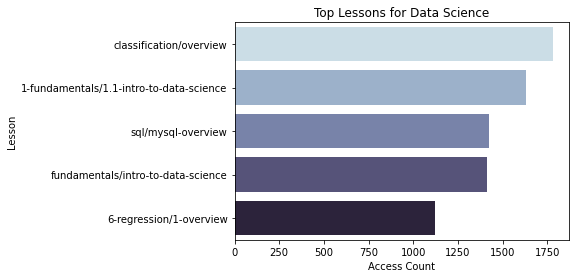

,path
classification/overview,1785
1-fundamentals/1.1-intro-to-data-science,1633
sql/mysql-overview,1424
fundamentals/intro-to-data-science,1413
6-regression/1-overview,1124


In [15]:
# Top lessons for Data Science
top_course_lessons = pd.DataFrame(lesson[lesson.course_subdomain == 'ds'].path.value_counts().head(5))
plt.figure(figsize=(6, 4))
sns.barplot(data=top_course_lessons,
x="path", y=top_course_lessons.index, palette="ch:s=.25,rot=-.25", )
plt.title('Top Lessons for Data Science')
plt.xlabel('Access Count')
plt.ylabel('Lesson')
plt.show()
top_course_lessons

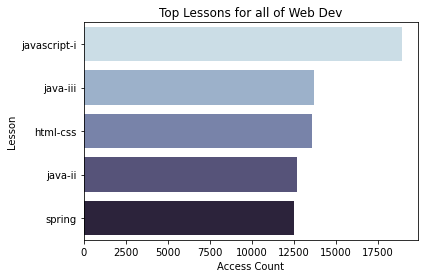

,path
javascript-i,18973
java-iii,13729
html-css,13619
java-ii,12681
spring,12518


In [16]:
# Top lessons for all Web Dev
top_course_lessons = pd.DataFrame(lesson[lesson.course_subdomain != 'ds'].path.value_counts().head(5))
plt.figure(figsize=(6, 4))
sns.barplot(data=top_course_lessons,
x="path", y=top_course_lessons.index, palette="ch:s=.25,rot=-.25", )
plt.title('Top Lessons for all of Web Dev')
plt.xlabel('Access Count')
plt.ylabel('Lesson')
plt.show()
top_course_lessons

#### Findings:
Java Full Stack Web Dev is by far the largest course and accesses the following courses the most:
1. javascript-i
2. java-iii
3. html-css

For PHP Full Stack Web Dev it was:
1. index.html
2. javascript-i
3. html-css

For the few Front End Web Dev students it was:
1. content/html-css
2. content/html-css/gitbook/images/favicon.ico
3. content/html-css/introduction.html

For Data Science it was:
1. classification/overview
2. 1-fundamentals/1.1-intro-to-data-science
3. sql/mysql-overview

### 2. Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?

In [17]:
lesson.head(1)

,path,user_id,cohort_id,ip,name,slack,start_date,end_date,created_at,updated_at,program_id,course_name,course_subdomain,hour,weekday
timestamp,,,,,,,,,,,,,,,
2018-01-26 09:56:02,java-ii,1,8,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1,PHP Full Stack Web Dev,php,9,Friday


In [18]:
cohort_keys = lesson.name.unique()
cohort_keys

array(['Hampton', 'Teddy', 'Sequoia', 'Arches', 'Niagara', 'Pinnacles',
       'Quincy', 'none', 'Kings', 'Lassen', 'Mammoth', 'Glacier',
       'Denali', 'Joshua', 'Olympic', 'Ulysses', 'Badlands', 'Apollo',
       'Ike', 'Voyageurs', 'Wrangell', 'Xanadu', 'Franklin', 'Yosemite',
       'Staff', 'Zion', 'Andromeda', 'Betelgeuse', 'Ceres', 'Bayes',
       'Deimos', 'Europa', 'Fortuna', 'Curie', 'Apex', 'Ganymede',
       'Hyperion', 'Darden', 'Bash', 'Jupiter', 'Kalypso', 'Luna',
       'Easley', 'Marco', 'Florence', 'Neptune', 'Oberon'], dtype=object)

In [19]:
# For loop to gather the top five lessons for each cohort
list_of_cohorts = []
cohort_keys = lesson.name.unique()

for keys in cohort_keys:
    cohorts = pd.DataFrame(lesson[lesson.name == keys].path.value_counts().head(5))
    list_of_cohorts.append(cohorts)

In [20]:
# Dataframe with all of the cohorts top five lessons!
top_cohort_lesson = pd.concat(list_of_cohorts, keys=cohort_keys, names=['cohort', 'lesson'])
top_cohort_lesson.head(10)

path
cohort  lesson                        
Hampton java-iii                    57
        java-i                      46
        java-ii                     46
        spring                      43
        javascript-i                36
Teddy   spring                     744
        java-iii                   732
        mysql                      638
        javascript-i               615
        mkdocs/search_index.json   595

In [21]:
tcl = top_cohort_lesson.reset_index(level=[0,1])
tcl.head(10)

,cohort,lesson,path
0,Hampton,java-iii,57
1,Hampton,java-i,46
2,Hampton,java-ii,46
3,Hampton,spring,43
4,Hampton,javascript-i,36
5,Teddy,spring,744
6,Teddy,java-iii,732
7,Teddy,mysql,638
8,Teddy,javascript-i,615
9,Teddy,mkdocs/search_index.json,595


In [22]:
tcl.lesson.value_counts().tail(20)

6-regression/5.0-evaluate                           1
content/html-css/gitbook/images/favicon.ico         1
content/php_ii/command-line/io-streams.html         1
html-css/css-ii/bootstrap-grid-system               1
content/php_ii/command-line                         1
prework/versioning/github                           1
html-css/introduction                               1
anomaly-detection/overview                          1
javascript-ii/es6                                   1
regression/model                                    1
content/laravel/intro/gitbook/images/favicon.ico    1
javascript-i/conditionals                           1
sql/joins                                           1
spring/fundamentals/repositories                    1
javascript-i/introduction/primitive-types           1
3-sql/1-mysql-overview                              1
5-stats/3-probability-distributions                 1
4-python/8.4.3-dataframes                           1
java-iii/user-input         

In [23]:
tcl[tcl.lesson == 'javascript-i/introduction/working-with-data-types-operators-and-variables'].sort_values('path', ascending=False)

,cohort,lesson,path
212,Marco,javascript-i/introduction/working-with-data-ty...,505
221,Neptune,javascript-i/introduction/working-with-data-ty...,329
202,Luna,javascript-i/introduction/working-with-data-ty...,315
229,Oberon,javascript-i/introduction/working-with-data-ty...,146
56,Glacier,javascript-i/introduction/working-with-data-ty...,24


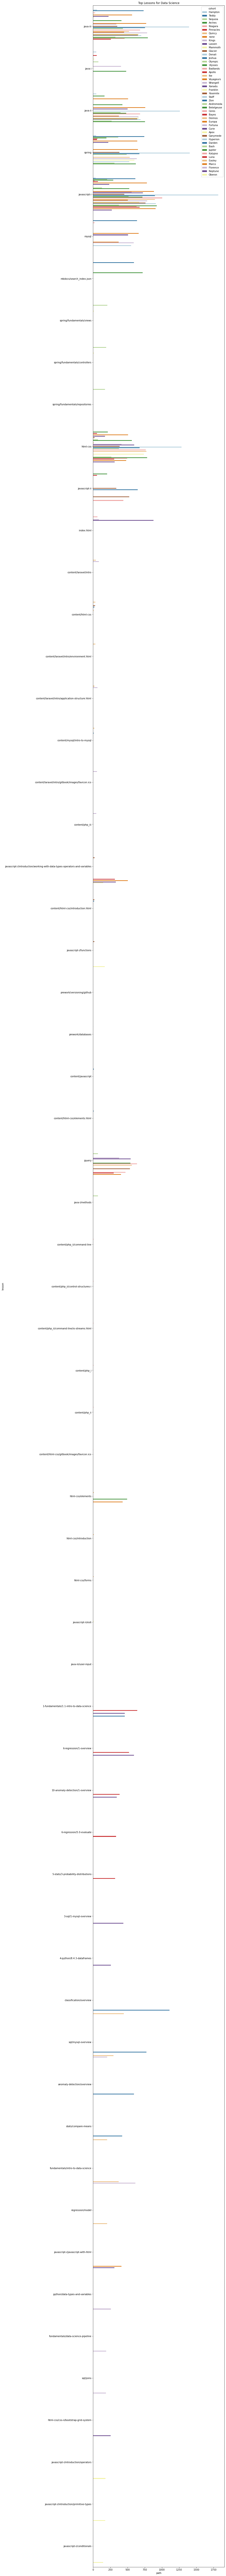

In [24]:

plt.figure(figsize=(10, 200))
sns.barplot(data=tcl, x="path", y="lesson", 
            hue="cohort", palette="Paired", )
plt.title('Top Lessons for Data Science')
plt.show()

#### Findings:
- The Staff accessed the top lessons the most 
- Darden cohort accessed the "Stats/compare-means" twice as much as Easley
- Darden cohort accessed the "sql/mysql-overview" more than three time as much as Easley or Florence
- Ceres cohort accessed the "jquery" more than any other cohort 
- Marco cohort accessed the "javascript-i/introduction/working-with-data-types-operators-and-variables" lesson more times than the four other cohorts that accessed that page by a path count of 176

### 5. At some point in 2019, the ability for students and alumni to access both curriculums (web dev to ds, ds to web dev) should have been shut off. Do you see any evidence of that happening? Did it happen before?


In [25]:
lesson['timestamp_year'] = lesson.index.year
lesson.head(1)

,path,user_id,cohort_id,ip,name,slack,start_date,end_date,created_at,updated_at,program_id,course_name,course_subdomain,hour,weekday,timestamp_year
timestamp,,,,,,,,,,,,,,,,
2018-01-26 09:56:02,java-ii,1,8,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1,PHP Full Stack Web Dev,php,9,Friday,2018


In [26]:
# To see if ds students are accessing web dev:
lesson[lesson.course_subdomain == 'ds'].path.value_counts().tail(50)

sql/mysql-introduction.md                         1
appendix/cli/2-Overview                           1
12-distributed-ml/6.1-prepare-part-1              1
End_to_End_clustering                             1
appendix/git/cli                                  1
5-stats/4.2-compare-means/null                    1
where                                             1
classification/explore-old                        1
2.1-spreadsheets-overview                         1
json-responses                                    1
b-clustering/project                              1
joins                                             1
statistics-assessment                             1
12-distributed-ml/6.2-prepare-part-2              1
storytelling/creating-custom-fields.md            1
3-sql                                             1
2-storytelling/1-overview/www.qlik.com            1
cli/4-navigating-the-filesystem                   1
5-detecting-with-clustering                       1
4-python/pan

#### Findings:
Yes, it seem as though ds students were acessing java and javascript pages

In [27]:
# Exploring all ds students from 2020 and later
ds = lesson[lesson.course_subdomain == 'ds']
ds[ds.timestamp_year > 2019].head(1)

,path,user_id,cohort_id,ip,name,slack,start_date,end_date,created_at,updated_at,program_id,course_name,course_subdomain,hour,weekday,timestamp_year
timestamp,,,,,,,,,,,,,,,,
2020-01-01 15:35:02,10-anomaly-detection/1-overview,476,34,136.50.49.145,Bayes,#,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,3,Data Science,ds,15,Wednesday,2020


In [28]:
ds[ds.timestamp_year > 2019].path.value_counts().tail(50)

b-clustering/project                                           1
11-nlp/topic-modeling                                          1
4-python/7.3-intro-to-numpy                                    1
sql                                                            1
3-sql                                                          1
7-classification/confusion-matrix.md                           1
7-classification/ensemble                                      1
sql/mysql-introduction.md                                      1
appendix/interview-questions-students                          1
spring                                                         1
acquire-and-prep                                               1
java-ii/object-oriented-programming                            1
%20https://github.com/RaulCPena                                1
sql.mysql-overview                                             1
2.1-spreadsheets-overview                                      1
json-responses           

#### Findings:
Although there are less, there are at least two instances of ds students wd site: java-ii/object-oriented-programming and spring


In [29]:
# Now exploring web dev:
wd = lesson[lesson.course_subdomain != 'ds']
wd.head(1)

,path,user_id,cohort_id,ip,name,slack,start_date,end_date,created_at,updated_at,program_id,course_name,course_subdomain,hour,weekday,timestamp_year
timestamp,,,,,,,,,,,,,,,,
2018-01-26 09:56:02,java-ii,1,8,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1,PHP Full Stack Web Dev,php,9,Friday,2018


In [30]:
# Web dev over all of the years:
wd.path.value_counts().tail(50)

Correlation.md                                          1
create                                                  1
job-portal                                              1
cohorts/24/grades                                       1
appendix/branching                                      1
5.04.04_LeastAngleRegression                            1
appendix/capstone-workbook/sw-planning.md               1
team                                                    1
javascript/apendix                                      1
11-distributed-ml/6.2-prepare-part-2                    1
grades/getUserDetails/912/3                             1
appendix/interview_questions_instructors                1
quiz/submit/2186                                        1
content/examples/examples/gitbook/images/favicon.ico    1
extra                                                   1
spring/extra-features/error-pages/asdfasdf              1
src                                                     1
7.04.02_Hierar

In [31]:
# Web Dev after 2019:
wd[wd.timestamp_year > 2019].path.value_counts().tail(50)

appendix/javascript/hoisting                                                            1
jquery/ajax.json                                                                        1
slides/css                                                                              1
slides/exceptions_and_error_handlings                                                   1
appendix/open_data/www.basketball-reference.com                                         1
appendix/cli/more-topics                                                                1
content/examples/php/internal_functions.php                                             1
2.01.00_Descriptive_Stats                                                               1
examples/bootstrap/pizza.png%22);                                                       1
mysql//functions                                                                        1
ltc                                                                                     1
classifica

#### Findings:
For web Dev, they did seem to access the Data Science curriculum fairly often prior to having access denied. After 2019, there was a large drop off, but there seems to be a few cases where a data science topic was accessed.

### 6. What topics are grads continuing to reference after graduation and into their jobs (for each program)?


In [32]:
lesson.head(1)

,path,user_id,cohort_id,ip,name,slack,start_date,end_date,created_at,updated_at,program_id,course_name,course_subdomain,hour,weekday,timestamp_year
timestamp,,,,,,,,,,,,,,,,
2018-01-26 09:56:02,java-ii,1,8,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1,PHP Full Stack Web Dev,php,9,Friday,2018


In [33]:
# Dataframe with paths that were accessed after a cohort's end date:
after_grad = lesson[lesson.index > lesson.end_date]

In [34]:
after_grad[after_grad.course_subdomain != 'ds'].path.value_counts().head(10)

javascript-i                        5749
spring                              4913
html-css                            4195
java-iii                            4108
java-ii                             3952
java-i                              3528
javascript-ii                       3417
mysql                               3006
jquery                              2953
spring/fundamentals/repositories    2029
Name: path, dtype: int64

#### Findings:
Overall, the top ten lessons accessed by post grads are:
- javascript-i:                         5749
- spring:                               4914
- html-css:                             4195
- java-iii:                             4108
- java-ii:                              3952
- java-i:                               3528
- javascript-ii:                        3417
- mysql:                                3011
- jquery:                               2953
- spring/fundamentals/repositories:     2029

By Web Dev Students:
- javascript-i:                         5749
- spring:                               4913
- html-css:                             4195
- java-iii:                             4108
- java-ii:                              3952
- java-i:                               3528
- javascript-ii:                        3417
- mysql:                                3006
- jquery:                               2953
- spring/fundamentals/repositories:     20 

By Data Science Students:
- sql/mysql-overview:                           275
- classification/overview:                      267
- anomaly-detection/overview:                   191
- fundamentals/intro-to-data-science:           184
- 1-fundamentals/1.1-intro-to-data-science:     127
- sql/database-design:                           87
- 6-regression/1-overview:                       86
- classification/prep:                           77
- fundamentals/environment-setup:                76
- stats/compare-means:                           73

### 7. Which lessons are least accessed?

In [35]:
lesson.path.value_counts().tail(10)

nlp                                                     1
appendix/testing-code.md                                1
132                                                     1
12-advanced-topics/3.8-json-responses                   1
bonus-exercises                                         1
appendix/further-reading/flexbox-additional-concepts    1
html                                                    1
java-iii/servlets/cssasxz                               1
5-detecting-with-clustering                             1
capstone/team                                           1
Name: path, dtype: int64

#### Findings:
These are the bottom 10 least accessed lessons:
- content/examples/php/arithmetic.php     
- 5.04.04_LeastAngleRegression            
- 1._Fundamentals/index.html              
- javascri                                
- f                                       
- javascript-i/html-css                   
- bad-charts                              
- Correlation.md                          
- extra-exercises/j                       
- html-css/css-ii/boostrap-grid-system    